In [1]:
import pandas as pd
df = pd.read_csv("Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [2]:
#Data Preprocessing
df.shape

(1470, 35)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#duplicate check
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

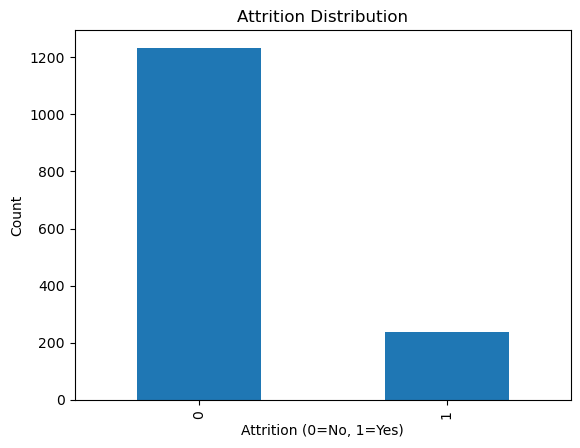

In [5]:
#EDA
import matplotlib.pyplot as plt

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

df["Attrition"].value_counts()
df["Attrition"].value_counts().plot(kind="bar")
plt.title("Attrition Distribution")
plt.xlabel("Attrition (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()
 


Report: Attrition seems to be imbalanced, with a smaller proportion of employees leaving the organization.

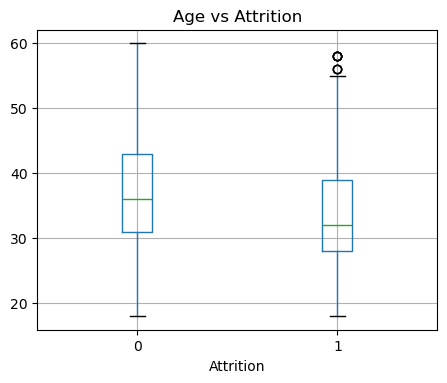

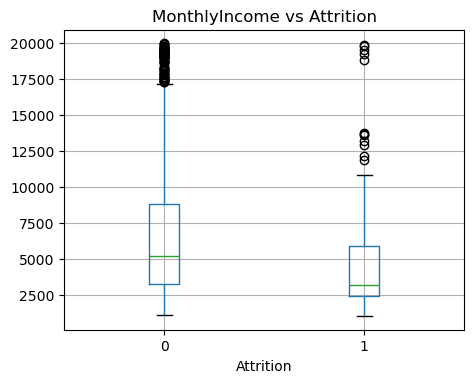

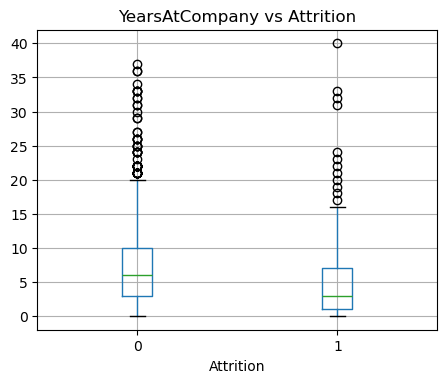

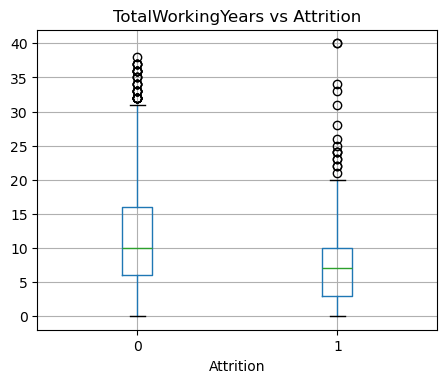

In [6]:
import matplotlib.pyplot as plt

num_cols = ["Age", "MonthlyIncome", "YearsAtCompany", "TotalWorkingYears"]

for col in num_cols:
    df.boxplot(column=col, by="Attrition", figsize=(5,4))
    plt.title(f"{col} vs Attrition")
    plt.suptitle("")
    plt.show()


Report: Employees who leave tend to be younger, less experienced, lower paid, and newer to the company.

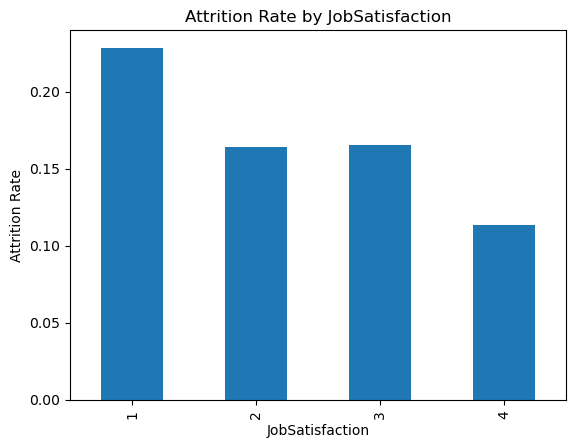

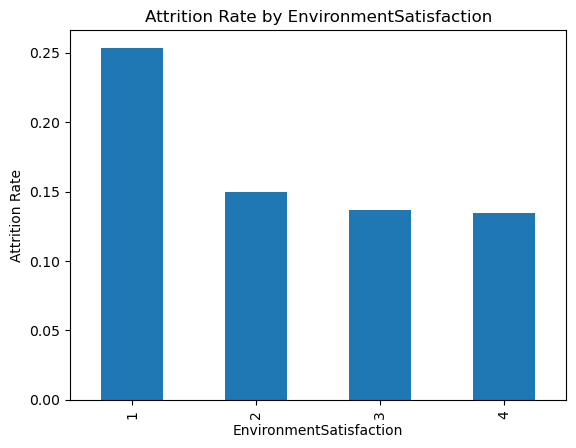

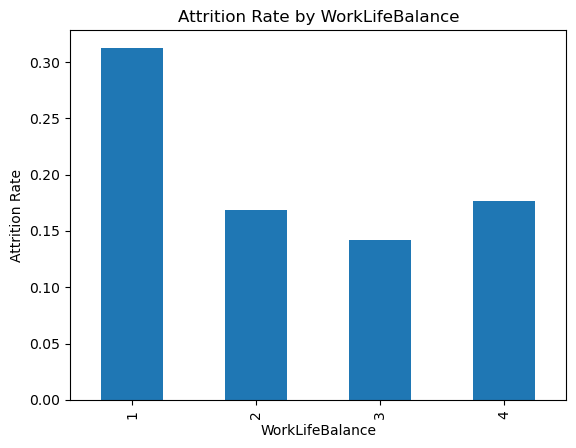

In [7]:
ordinal_cols = [
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "WorkLifeBalance"
]

for col in ordinal_cols:
    df.groupby(col)["Attrition"].mean().plot(kind="bar")
    plt.title(f"Attrition Rate by {col}")
    plt.ylabel("Attrition Rate")
    plt.show()


Report: Lower satisfaction and poor work-life balance are associated with higher attrition.

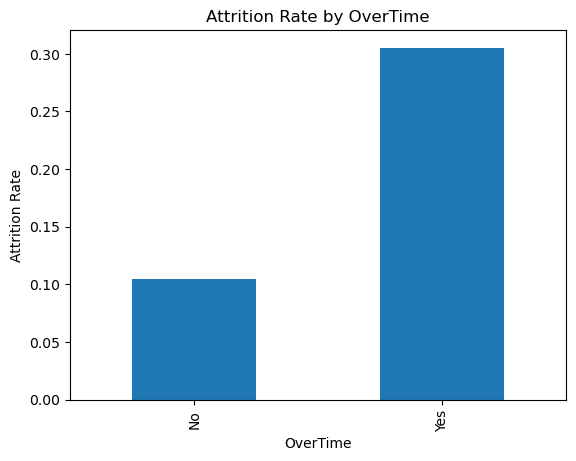

In [8]:
df.groupby("OverTime")["Attrition"].mean().plot(kind="bar")
plt.title("Attrition Rate by OverTime")
plt.ylabel("Attrition Rate")
plt.show()


Report: People who work overtime seem to have a higher attrition rate.

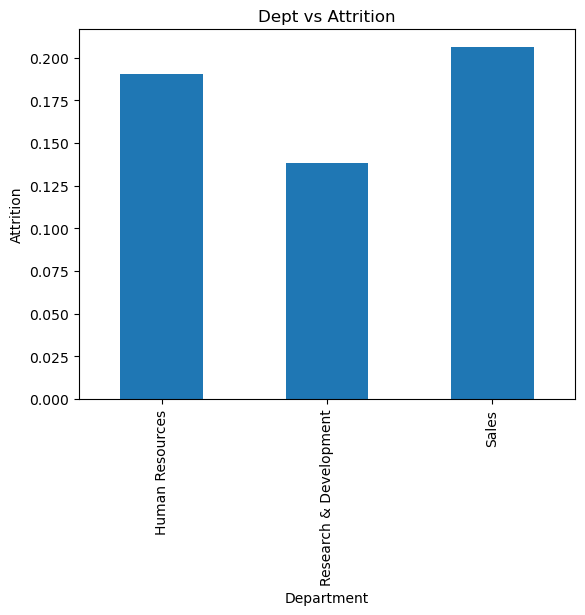

In [9]:
df.groupby("Department")["Attrition"].mean().plot(kind="bar")
plt.title("Dept vs Attrition")
plt.ylabel("Attrition")
plt.show()

Report: Research dept has the least attrition.

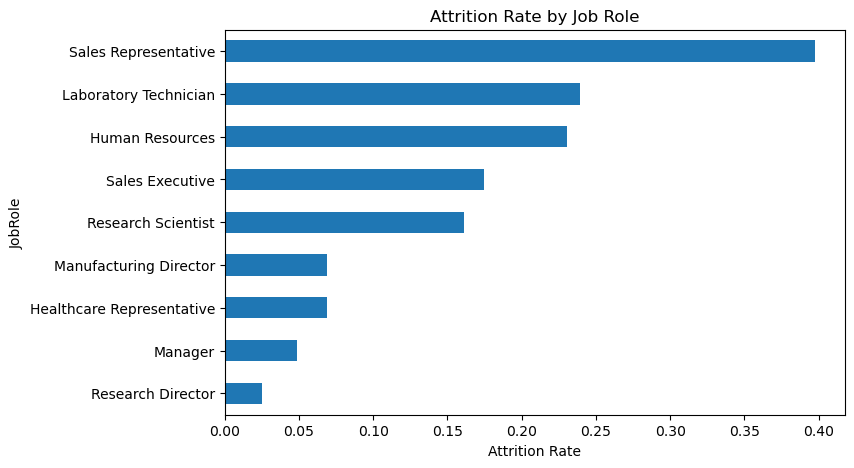

In [10]:
df.groupby("JobRole")["Attrition"].mean().sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Attrition Rate by Job Role")
plt.xlabel("Attrition Rate")
plt.show()


Report: Sales representative seems to have a higher attrition rate suggesting higher pressure. 

In [11]:
import numpy as np
target = "Attrition"
X = df.drop(columns=[target])
y = df[target]

numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns


In [12]:
numeric_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
print(X.shape, y.shape)
y.value_counts()

(1470, 34) (1470,)


Attrition
0    1233
1     237
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train attrition rate:", y_train.mean())
print("Test attrition rate:", y_test.mean())


Train: (1176, 34) Test: (294, 34)
Train attrition rate: 0.16156462585034015
Test attrition rate: 0.1598639455782313


In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier

model_params = {
    'knn':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11],
            'metric':['euclidean', 'manhattan']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'max_depth':[1,2,3,5,10,15,None],
            'criterion': ['gini', 'entropy'],
        }
    },

    'svm':{
        'model':svm.SVC(),
        'params':{
            'C':[1,5,7,10,20],
            'kernel':['rbf', 'linear']
        }
    },

    'xgboost':{
        'model': XGBClassifier(
            objective='binary:logistic',
            eval_metric='logloss')
        ,
        'params':{
            'n_estimators':[5,10,15,20],
            'learning_rate':[0.01, 0.05, 0.1],
            'max_depth':[3,5,7]
        }
    }
            
}

In [17]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# identify columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(exclude=["object", "category"]).columns

# preprocess: impute + onehot (the simple one caused an error because of characters present)
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

scores = []

for model_name, mp in model_params.items():
    pipe = Pipeline([
        ("prep", preprocess),
        ("model", mp["model"])
    ])

    param_grid = {f"model__{k}": v for k, v in mp["params"].items()}

    clf = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=-1, scoring="accuracy")
    clf.fit(X, y)

    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })

df = pd.DataFrame(scores).sort_values("best_score", ascending=False).reset_index(drop=True)
df


,model,best_score,best_params
0,random_forest,0.858503,"{'model__criterion': 'entropy', 'model__max_de..."
1,xgboost,0.853741,"{'model__learning_rate': 0.1, 'model__max_dept..."
2,svm,0.852381,"{'model__C': 20, 'model__kernel': 'linear'}"
3,knn,0.835374,"{'model__metric': 'euclidean', 'model__n_neigh..."


In [18]:
best_model = clf.best_estimator_ 
best_model


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked'...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=20, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [19]:
new_employee = X.iloc[[0]].copy() 

# changing
new_employee.loc[new_employee.index[0], "Age"] = 29
new_employee.loc[new_employee.index[0], "BusinessTravel"] = "Travel_Rarely"
new_employee.loc[new_employee.index[0], "MonthlyIncome"] = 4500
new_employee.loc[new_employee.index[0], "OverTime"] = "Yes"

pred = best_model.predict(new_employee)[0]
prob = best_model.predict_proba(new_employee)[0, 1]
label = "will likely leave (Attrition: Yes)" if pred == 1 else "will likely stay (Attrition: No)"
sentence = f"The model predicts this employee {label} with an estimated attrition probability of {prob:.1%}."
sentence

'The model predicts this employee will likely stay (Attrition: No) with an estimated attrition probability of 32.5%.'

In [20]:
import joblib
joblib.dump(best_model, "attrition_model.pkl")

joblib.dump(list(X.columns), "feature_cols.pkl")


['feature_cols.pkl']